In [5]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results, parse_JBiclustGE
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params,F1_per_bic

%matplotlib inline

In [10]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [17]:
# predicted biclusters 
tool_name = "BiBit"
tool_suffix = "BiBit"
n_runs = 1

parameters = (("n_bics",[10,15,100]),
              ("pattern_bitsize",[8,16,32]),
              ("max_discr_val",[1.0,0.5,1.5,2.0])) 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/F1/img"
tsv_outdir = "../simulated_datasets/results/F1/"



In [18]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,s,len(bics))

5 10 10
5 20 10
5 50 10
5 100 10
10 10 10
10 20 10
10 50 10
10 100 10
20 10 10
20 20 10
20 50 10
20 100 10
50 10 10
50 20 10
50 50 10
50 100 10
100 10 10
100 20 10
100 50 10
100 100 10


In [19]:
n_genes = 20
n_samples = 50
true_bic_fname = true_bic_fname_prefix+str(n_genes)+","+str(n_samples)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)



params_folder = "n_bics=10,pattern_bitsize=8,max_discr_val=0.5"
pred_bic_fname = pred_bic_fname_prefix+str(n_genes)+","+str(n_samples)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=8,max_discr_val=0.5/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT'

In [20]:
runs = parse_JBiclustGE(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, len(pred_bics),np.mean(F1_per_bic(true_bics, pred_bics, verbose = False)) )


0 10 0.006988951910262742


In [21]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=10,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT
Failed to parse 

Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=15,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT
Failed to parse 

Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT
Failed to parse ../JbiclustGE/simulated_data/BiBit/n_bics=100,pattern_bitsize=32,max_discr_val=1.0/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT
Failed to

In [23]:
#results.head(20)

In [24]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

Total combinations: 36
Total combinations: 36
Combinations with mean F1 > 0.0 24


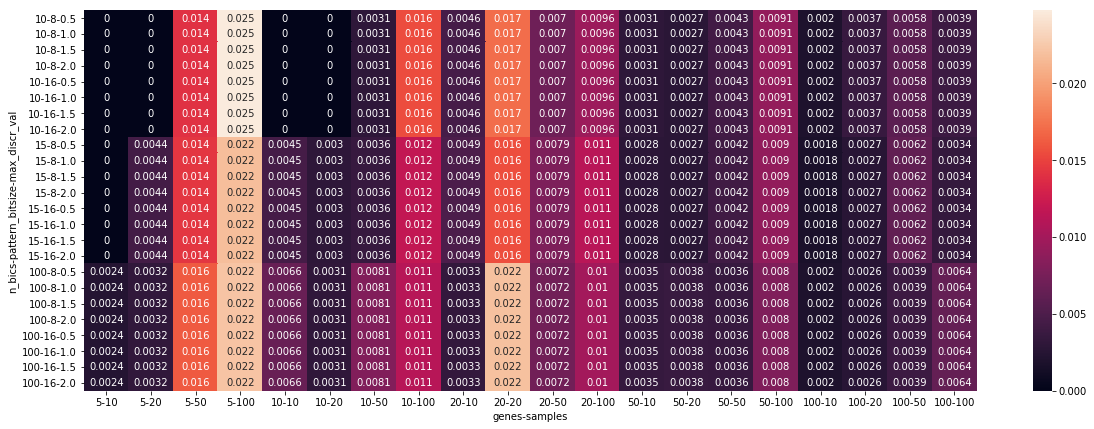

In [26]:
params = ["n_bics","pattern_bitsize","max_discr_val"]
plot_file = img_outdir+"/" + tool_suffix+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.0,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [27]:
parameters

(('n_bics', [10, 15, 100]),
 ('pattern_bitsize', [8, 16, 32]),
 ('max_discr_val', [1.0, 0.5, 1.5, 2.0]))

In [28]:
default_params = (10,16,1.0)

In [29]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 720 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	n_bics=100;
	pattern_bitsize=8;
	max_discr_val=1.0;
	Max. avg. F1 per bicluster:0.007±0.006
	avg. F1 per best match:0.022±0.013
	biclusters per run:100.0±0.0
With default parameters:
	n_bics=10;
	pattern_bitsize=16;
	max_discr_val=1.0;
	avg. F1 per bicluster:0.007±0.007
	avg. F1 per best match:0.006±0.006
	biclusters per run:10.0±0.0


F1 per bicluster                  \
                                                 mean       std count   
n_bics pattern_bitsize max_discr_val                                    
100    8               1.0                   0.007461  0.006132    20   
       16              2.0                   0.007461  0.006132    20   
                       1.5                   0.007461  0.006132    20   
                       1.0                   0.007461  0.006132    20   
                       0.5                   0.007461  0.006132    20   
       8               2.0                   0.007461  0.006132    20   
                       1.5                   0.007461  0.006132    20   
                       0.5                   0.007461  0.006132    20   
15     8               0.5                   0.006819  0.005571    20   
                       2.0                   0.006819  0.005571    20   
                       1.5                   0.006819  0.005571    20   
                       1.0                   0.006819  0.005571    20   
       16              1.5                   0.006819  0.005571    20   
                       2.0                   0.006819  0.005571    20   
                       1.0                   0.006819  0.005571    20   
                       0.5                   0.006819  0.005571    20   
10     8               1.0                   0.006524  0.006702    20   
                       0.5                   0.006524  0.006702    20   
       16              1.5                   0.006524  0.006702    20   
                       1.0                   0.006524  0.006702    20   
       8               1.5                   0.006524  0.006702    20   
                       2.0                   0.006524  0.006702    20   
       16              0.5                   0.006524  0.006702    20   
                       2.0                   0.006524  0.006702    20   
100    32              1.5                   0.000000  0.000000    20   
                       1.0                   0.000000  0.000000    20   
                       0.5                   0.000000  0.000000    20   
10     32              2.0                   0.000000  0.000000    20   
                       1.5                   0.000000  0.000000    20   
                       0.5                   0.000000  0.000000    20   
                       1.0                   0.000000  0.000000    20   
15     32              2.0                   0.000000  0.000000    20   
                       1.5                   0.000000  0.000000    20   
                       1.0                   0.000000  0.000000    20   
                       0.5                   0.000000  0.000000    20   
100    32              2.0                   0.000000  0.000000    20   

                                                         F1 per best match  \
                                           max       min              mean   
n_bics pattern_bitsize max_discr_val                                         
100    8               1.0            0.022151  0.002002          0.022156   
       16              2.0            0.022151  0.002002          0.022156   
                       1.5            0.022151  0.002002          0.022156   
                       1.0            0.022151  0.002002          0.022156   
                       0.5            0.022151  0.002002          0.022156   
       8               2.0            0.022151  0.002002          0.022156   
                       1.5            0.022151  0.002002          0.022156   
                       0.5            0.022151  0.002002          0.022156   
15     8               0.5            0.021833  0.000000          0.008257   
                       2.0            0.021833  0.000000          0.008257   
                       1.5            0.021833  0.000000          0.008257   
                       1.0            0.021833  0.000000          0.008257   
       16          